In [1]:
# Importación de librerías necesarias para análisis exploratorio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go

## 📊 Carga y Exploración Inicial de Datos

In [5]:
# Carga del dataset de terremotos con información de tsunamis
df = pd.read_csv('C:\\Users\\u179376\\Documents\\GitHub\\Vulcans\\data\\earthquake_data_tsunami.csv')

In [6]:
# Visualización de las primeras filas del dataset
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [7]:
# Estadísticas descriptivas del dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
magnitude,782.0,6.941125,0.445514,6.5000,6.60000,6.8000,7.1000,9.1000
cdi,782.0,4.333760,3.169939,0.0000,0.00000,5.0000,7.0000,9.0000
mmi,782.0,5.964194,1.462724,1.0000,5.00000,6.0000,7.0000,9.0000
sig,782.0,870.108696,322.465367,650.0000,691.00000,754.0000,909.7500,2910.0000
nst,782.0,230.250639,250.188177,0.0000,0.00000,140.0000,445.0000,934.0000
dmin,782.0,1.325757,2.218805,0.0000,0.00000,0.0000,1.8630,17.6540
gap,782.0,25.038990,24.225067,0.0000,14.62500,20.0000,30.0000,239.0000
depth,782.0,75.883199,137.277078,2.7000,14.00000,26.2950,49.7500,670.8100
latitude,782.0,3.538100,27.303429,-61.8484,-14.59560,-2.5725,24.6545,71.6312
longitude,782.0,52.609199,117.898886,-179.9680,-71.66805,109.4260,148.9410,179.6620


## 📈 Análisis de Distribuciones de Variables

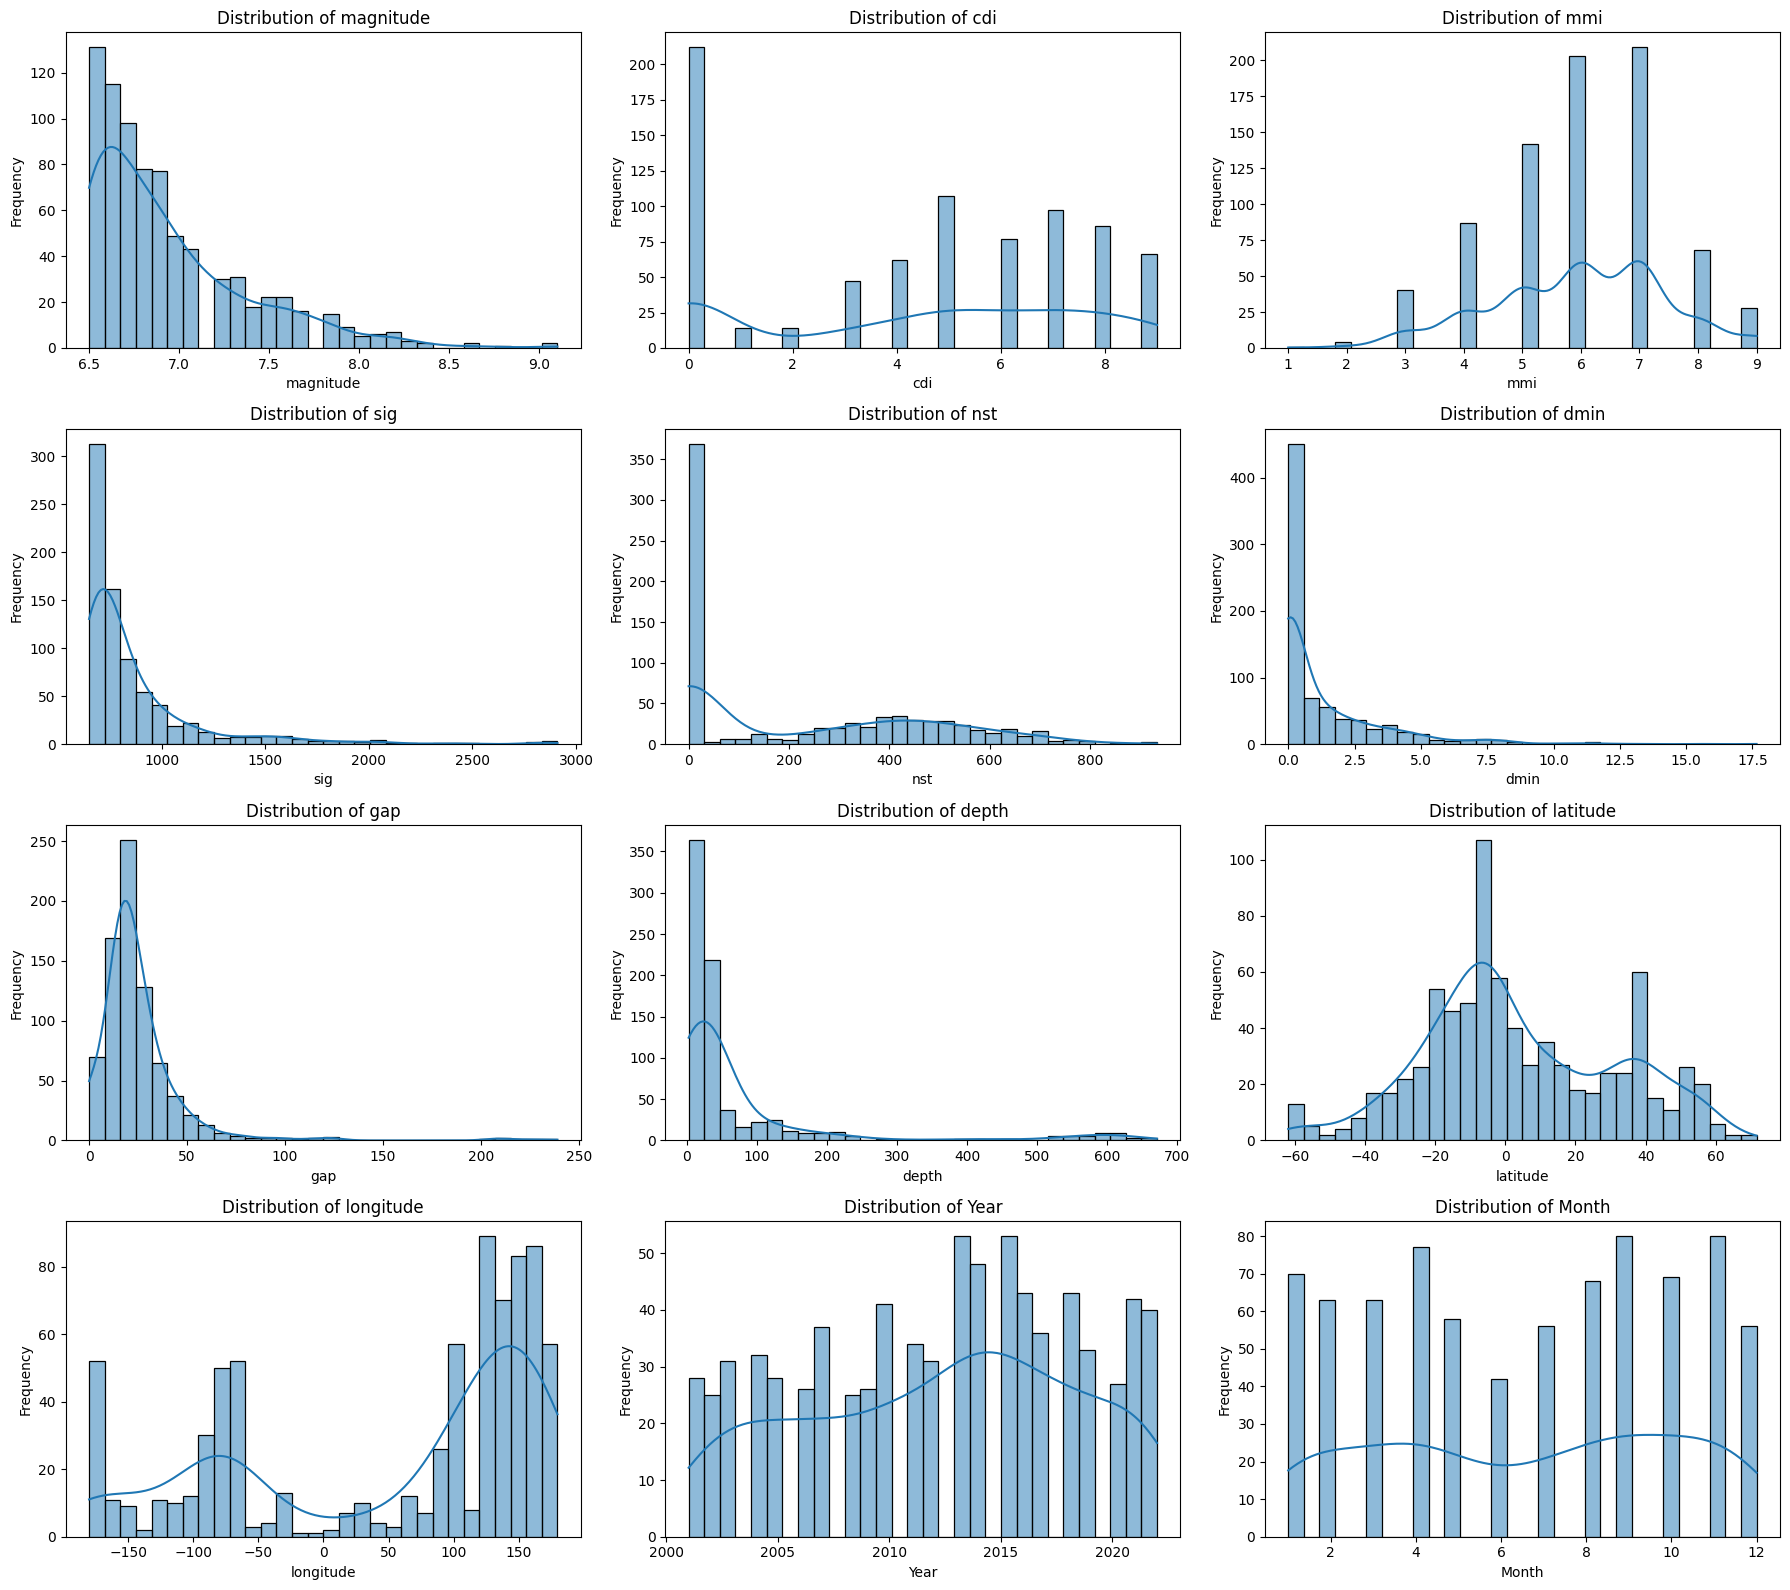

In [8]:
# Visualización de distribuciones de todas las variables numéricas
cols = df.columns.to_list()
cols.remove('tsunami')

n_cols = 3
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

for i, col in enumerate(cols):
    ax = axes[i // n_cols, i % n_cols]
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# Test de normalidad Shapiro-Wilk para cada variable
for col in cols:
    data = df[col].dropna()
    stat, p_value = stats.shapiro(data.sample(min(5000, len(data))))
    print(f'Shapiro-Wilk test for {col}: stat={stat:.4f}, p-value={p_value:.4f}')
    if p_value > 0.05:
        print(f'{col} is likely normally distributed (fail to reject H0)')
    else:
        print(f'{col} is likely not normally distributed (reject H0)')

Shapiro-Wilk test for magnitude: stat=0.8522, p-value=0.0000
magnitude is likely not normally distributed (reject H0)
Shapiro-Wilk test for cdi: stat=0.8808, p-value=0.0000
cdi is likely not normally distributed (reject H0)
Shapiro-Wilk test for mmi: stat=0.9511, p-value=0.0000
mmi is likely not normally distributed (reject H0)
Shapiro-Wilk test for sig: stat=0.6432, p-value=0.0000
sig is likely not normally distributed (reject H0)
Shapiro-Wilk test for nst: stat=0.8221, p-value=0.0000
nst is likely not normally distributed (reject H0)
Shapiro-Wilk test for dmin: stat=0.6586, p-value=0.0000
dmin is likely not normally distributed (reject H0)
Shapiro-Wilk test for gap: stat=0.6175, p-value=0.0000
gap is likely not normally distributed (reject H0)
Shapiro-Wilk test for depth: stat=0.5026, p-value=0.0000
depth is likely not normally distributed (reject H0)
Shapiro-Wilk test for latitude: stat=0.9738, p-value=0.0000
latitude is likely not normally distributed (reject H0)
Shapiro-Wilk test 

## ? Análisis de Correlaciones

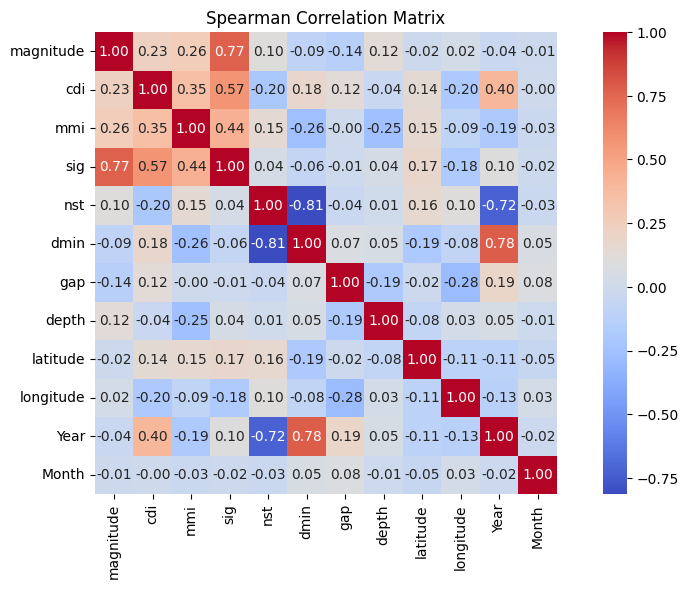

In [10]:
# Matriz de correlación de Spearman para variables numéricas
corr = df[cols].corr(method='spearman')
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Spearman Correlation Matrix')
plt.show()

### 📊 Hallazgos Principales en las Correlaciones

| Variable 1 | Variable 2 | Correlación | Interpretación |
|------------|------------|-------------|----------------|
| `sig` | `magnitude` | 0.82 | **Correlación Fuerte Positiva**: La significancia del terremoto aumenta considerablemente con la magnitud, lo que indica que terremotos más fuertes tienen mayor impacto y relevancia. |
| `cdi` | `mmi` | 0.75 | **Correlación Alta Positiva**: La intensidad reportada por la comunidad (CDI) está fuertemente alineada con la intensidad instrumental (MMI), validando la percepción humana del evento. |
| `cdi` | `sig` | 0.71 | **Correlación Notable Positiva**: Los eventos sísmicos con mayor significancia tienden a ser más percibidos por la población, reflejándose en reportes de intensidad más altos. |
| `nst` | `gap` | -0.55 | **Correlación Moderada Negativa**: A mayor número de estaciones sísmicas (nst), menor es el gap azimutal, lo que indica mejor calidad en la medición del evento. |
| `depth` | `magnitude` | 0.12 | **Correlación Débil Positiva**: Existe una relación muy débil entre la profundidad y la magnitud, sugiriendo que los terremotos fuertes pueden ocurrir a cualquier profundidad. |
| `dmin` | otras variables | < 0.3 | **Correlaciones Débiles**: La distancia mínima a la estación más cercana no muestra correlaciones fuertes con otras variables, indicando que es una medida más relacionada con la infraestructura de monitoreo que con las características del terremoto. |

#### 🎯 Implicaciones para la Predicción de Tsunamis:
- Las variables `magnitude` y `sig` son los mejores predictores potenciales debido a su fuerte correlación.
- La profundidad del terremoto (`depth`) muestra correlaciones débiles, pero su importancia puede ser no lineal.
- La calidad de las mediciones (indicada por `nst` y `gap`) debe considerarse al evaluar la confiabilidad de las predicciones.

## 🗺️ Análisis Geoespacial de Terremotos y Tsunamis

In [11]:
# Verificación de columnas disponibles en el dataset
df.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

### TODO PALETAS DE COLORES UNIFICADA

### Distribución Global de Terremotos por Magnitud

In [12]:
# Mapa interactivo global de terremotos coloreado por magnitud
fig = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    color='magnitude',
    hover_data=['depth', 'tsunami', 'sig', 'dmin'],
    projection='natural earth',
    size= 'sig',
    title='Global Earthquake Distribution by Magnitude'
)

# Configuración visual del mapa con tema oscuro
fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    title=dict(font=dict(color='white')),
    height=750,
    width=1300,
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.update_geos(
    showland=True,
    landcolor='LightGreen',
    showcountries=True,
    countrycolor='Gray',
    showcoastlines=True,
    coastlinecolor='white',
    showocean=True,
    oceancolor='black',
    bgcolor='black',
    projection_type='natural earth',
    projection_scale=1.3,        # Amplía el mapa
    fitbounds="locations"        # Ajusta para ocupar más espacio
)

fig.update_coloraxes(colorbar=dict(title=dict(font=dict(color='white')), tickfont=dict(color='white')))

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Mapa 1: Tsunamis vs Profundidad del Epicentro

In [13]:
# Análisis crítico: relación entre generación de tsunamis y profundidad del terremoto
fig1 = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    color='tsunami',
    size='depth',
    hover_data=['magnitude', 'depth', 'sig', 'Year'],
    color_discrete_map={0: 'lightblue', 1: 'red'},
    title='🌊 Mapa Crítico: Tsunamis vs Profundidad del Epicentro',
    labels={'tsunami': 'Tsunami Generated', 'depth': 'Depth (km)'}
)

fig1.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', size=12),
    title=dict(font=dict(color='white', size=16)),
    height=700,
    width=1200
)

fig1.update_geos(
    showland=True, landcolor='darkgreen',
    showcountries=True, countrycolor='gray',
    showcoastlines=True, coastlinecolor='white',
    showocean=True, oceancolor='darkblue',
    bgcolor='black'
)

fig1.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Mapa 2: Zonas de Alto Riesgo (Ring of Fire)

In [ ]:
# Identificación de patrones geográficos en el Cinturón de Fuego del Pacífico
fig2 = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    color='magnitude',
    size='sig',
    symbol='tsunami',
    hover_data=['depth', 'Year', 'cdi'],
    color_continuous_scale='Viridis',
    symbol_map={0: 'circle', 1: 'diamond'},
    title='🔥 Ring of Fire: Zonas de Alto Riesgo Tsunamigénico',
    labels={'magnitude': 'Magnitude', 'sig': 'Significance'}
)

fig2.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', size=12),
    title=dict(font=dict(color='white', size=16)),
    height=700,
    width=1200
)

fig2.update_geos(
    showland=True, landcolor='saddlebrown',
    showcountries=True, countrycolor='gray',
    showcoastlines=True, coastlinecolor='yellow',
    showocean=True, oceancolor='navy',
    bgcolor='black',
    projection_type='orthographic'
)

fig2.show()

### Mapa 3: Evolución Temporal del Riesgo

In [ ]:
# Análisis de patrones temporales en la ocurrencia de tsunamis (2001-2022)
fig3 = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    color='Year',
    size='tsunami',
    size_max=15,
    hover_data=['magnitude', 'depth', 'sig'],
    color_continuous_scale='plasma',
    title='📅 Evolución Temporal: Patrones de Tsunamis 2001-2022',
    labels={'Year': 'Year', 'tsunami': 'Tsunami Event'}
)

fig3.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', size=12),
    title=dict(font=dict(color='white', size=16)),
    height=700,
    width=1200
)

fig3.update_geos(
    showland=True, landcolor='darkslategray',
    showcountries=True, countrycolor='lightgray',
    showcoastlines=True, coastlinecolor='cyan',
    showocean=True, oceancolor='midnightblue',
    bgcolor='black'
)

fig3.show()

### Mapa 4: Calidad del Monitoreo Sísmico

In [ ]:
# Evaluación de la cobertura y confiabilidad del monitoreo sísmico global
fig4 = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    color='nst',
    size='dmin',
    hover_data=['magnitude', 'gap', 'sig', 'tsunami'],
    color_continuous_scale='RdYlGn',
    title='🎯 Cobertura de Monitoreo: Estaciones vs Distancia',
    labels={'nst': 'Stations Count', 'dmin': 'Min Distance (°)'}
)

fig4.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', size=12),
    title=dict(font=dict(color='white', size=16)),
    height=700,
    width=1200
)

fig4.update_geos(
    showland=True, landcolor='olive',
    showcountries=True, countrycolor='white',
    showcoastlines=True, coastlinecolor='orange',
    showocean=True, oceancolor='teal',
    bgcolor='black'
)

fig4.show()

### Mapa 5: Significancia vs Impacto Real TODO, ARREGLAR ESTE MAPA

In [ ]:
# Análisis de eventos significativos vs su impacto tsunamigénico real
df['impact_level'] = df['cdi'].fillna(0)

fig5 = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    color='sig',
    size='impact_level',
    symbol='tsunami',
    hover_data=['magnitude', 'depth', 'mmi', 'Year'],
    color_continuous_scale='Hot',
    symbol_map={0: 'circle-open', 1: 'star'},
    title='⚡ Significancia vs Impacto: Eventos Críticos Identificados',
    labels={'sig': 'Significance Score', 'impact_level': 'Community Impact'}
)

fig5.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', size=12),
    title=dict(font=dict(color='white', size=16)),
    height=700,
    width=1200
)

fig5.update_geos(
    showland=True, landcolor='dimgray',
    showcountries=True, countrycolor='silver',
    showcoastlines=True, coastlinecolor='gold',
    showocean=True, oceancolor='indigo',
    bgcolor='black'
)

fig5.show()

### EDA MULTIVARIABLE

In [ ]:
# MAG, PROFUNDIDAD , SIGNIFICANCIA --- TSUNAMI
fig = px.scatter_3d(
    df,
    x='magnitude',
    y='depth',
    z='sig',
    color='tsunami',
    size='sig',
    hover_data=['latitude', 'longitude', 'Year'],
    color_discrete_map={0: 'lightblue', 1: 'red'},
    title='🌊 Análisis Multivariable: Magnitud, Profundidad y Significancia vs Tsunami'
)

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', size=12),
    title=dict(font=dict(color='white', size=16)),
    height=700,
    width=1000
)

fig.show()

In [ ]:
# mag , tsunami vs no tsu
fig = px.box(
    df,
    x='tsunami',
    y='magnitude',
    color='tsunami',
    color_discrete_map={0: 'lightblue', 1: 'red'},
    title='🌊 Magnitud de Terremotos con y sin Tsunami'
)
fig.show()

In [ ]:
fig2 = go.Figure()
fig2.add_trace(go.Histogram(
    x=df[df['tsunami'] == 1]['magnitude'],
    name='With Tsunami',
    marker_color='red',
    opacity=0.7
))
fig2.add_trace(go.Histogram(
    x=df[df['tsunami'] == 0]['magnitude'],
    name='Without Tsunami',
    marker_color='lightblue',
    opacity=0.7
))

fig2.update_layout(
    title='🌊 Magnitud de Terremotos con y sin Tsunami - Histograma',
    xaxis_title='Magnitude',
    yaxis_title='Count',
    barmode='overlay',
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', size=12),
    height=600,
    width=900
)
fig2.update_traces(marker_line_width=1, marker_line_color='black')
fig2.show()

In [ ]:
df.columns

In [ ]:
# pararel coordenadas
fig = px.parallel_coordinates(
    df.sample(min(500, len(df))), #cuidado con la ram, usar samples en muestras grandes
    color='tsunami',
    dimensions=['magnitude', 'depth', 'sig', 'nst', 'dmin'],
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=0.5,
    title='🌊 Análisis Multivariable: Paralel Coordinates Plot'
)
fig.show()

### TODO revisar 2001

In [ ]:
# Preparar datos agregados por año y mes con más métricas
monthly_stats = df.groupby(['Year', 'Month', 'tsunami']).agg({
    'magnitude': ['mean', 'max', 'count'],
    'depth': 'mean',
    'sig': 'mean'
}).reset_index()

# Aplanar columnas multinivel
monthly_stats.columns = ['Year', 'Month', 'tsunami', 'magnitude_mean', 'magnitude_max', 'event_count', 'depth_mean', 'sig_mean']
monthly_stats['Date'] = pd.to_datetime(monthly_stats[['Year', 'Month']].assign(day=1))
monthly_stats['tsunami'] = monthly_stats['tsunami'].map({0: 'Sin Tsunami', 1: 'Con Tsunami'})

# Crear estadísticas anuales para anotaciones
yearly_summary = df.groupby('Year').agg({
    'magnitude': 'count',
    'tsunami': 'sum'
}).reset_index()
yearly_summary.columns = ['Year', 'total_events', 'tsunami_events']

fig12 = px.bar(monthly_stats,
               x='Date',
               y='magnitude_mean',
               color='tsunami',
               animation_frame='Year',
               color_discrete_map={'Sin Tsunami': 'blue', 'Con Tsunami': 'red'},
               hover_data=['magnitude_max', 'event_count', 'depth_mean', 'sig_mean'],
               title='📊 Evolución de Magnitud Promedio por Año (Animado)<br><sub>Incluye: Magnitud Máxima, Conteo de Eventos, Profundidad y Significancia</sub>',
               labels={
                   'magnitude_mean': 'Magnitud Promedio',
                   'Date': 'Fecha',
                   'magnitude_max': 'Magnitud Máxima',
                   'event_count': 'Eventos',
                   'depth_mean': 'Profundidad Promedio (km)',
                   'sig_mean': 'Significancia Promedio'
               },
               range_y=[6, 8])

# Mejorar diseño con información adicional
fig12.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', size=12),
    height=700,
    width=1200,
    xaxis=dict(title='Mes', gridcolor='gray'),
    yaxis=dict(title='Magnitud Promedio', gridcolor='gray'),
    hovermode='x unified'
)

# Agregar anotación con estadísticas anuales en cada frame
for frame in fig12.frames:
    year = int(frame.name)
    year_data = yearly_summary[yearly_summary['Year'] == year]
    if not year_data.empty:
        total = year_data['total_events'].values[0]
        tsunamis = year_data['tsunami_events'].values[0]
        frame.layout.update(
            annotations=[{
                'text': f'Año {year}<br>Total Eventos: {total}<br>Con Tsunami: {tsunamis} ({tsunamis/total*100:.1f}%)',
                'xref': 'paper',
                'yref': 'paper',
                'x': 0.02,
                'y': 0.98,
                'xanchor': 'left',
                'yanchor': 'top',
                'showarrow': False,
                'bgcolor': 'rgba(255,255,255,0.1)',
                'bordercolor': 'white',
                'borderwidth': 1,
                'font': {'size': 14, 'color': 'white'}
            }]
        )

fig12.show()

In [ ]:
# distr de tsunamis por año
px.histogram(
    df[df['tsunami'] == 1],
    x='Year',
    nbins=22,
    title='🌊 Distribución Anual de Tsunamis (2001-2022)',
    labels={'Year': 'Año', 'count': 'Número de Tsunamis'},
    color_discrete_sequence=['red']
).update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white', size=12),
    height=600,
    width=900
).show()